In [26]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
dailydata=pd.read_csv('/Users/pein/Desktop/train.csv')

# Data Summary

In [28]:
dailydata.shape

(10886, 12)

In [29]:
dailydata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [30]:
dailydata.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [31]:
dailydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


# Feature Engineering

In [32]:
dailydata['datetime']=dailydata.datetime.apply(pd.to_datetime)
dailydata['hour']=dailydata.datetime.apply(lambda x:x.hour)
dailydata['date']=dailydata.datetime.apply(lambda x:x.day)
dailydata['month']=dailydata.datetime.apply(lambda x:x.month)
dailydata['weekday']=dailydata.datetime.apply(lambda x:
                                              x.weekday)
dailydata['season']=dailydata.season.map({1:'Spring',2:'Summer',
                                         3:'Fall',4:'Winter'})
dailydata['weather']=dailydata.weather.map({1:'Clear+Few+clouns+Partly cloud+Party cloud',
                                           2:'Mist cloudMist+Broken cloud',
                                           3:'Light SnowLight Rain',
                                           4:'Heavy Rain+Ice Pallets'})
dailydata.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,date,month,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear+Few+clouns+Partly cloud+Party cloud,9.84,14.395,81,0.0,3,13,16,0,1,1,<built-in method weekday of Timestamp object a...
1,2011-01-01 01:00:00,Spring,0,0,Clear+Few+clouns+Partly cloud+Party cloud,9.02,13.635,80,0.0,8,32,40,1,1,1,<built-in method weekday of Timestamp object a...
2,2011-01-01 02:00:00,Spring,0,0,Clear+Few+clouns+Partly cloud+Party cloud,9.02,13.635,80,0.0,5,27,32,2,1,1,<built-in method weekday of Timestamp object a...
3,2011-01-01 03:00:00,Spring,0,0,Clear+Few+clouns+Partly cloud+Party cloud,9.84,14.395,75,0.0,3,10,13,3,1,1,<built-in method weekday of Timestamp object a...
4,2011-01-01 04:00:00,Spring,0,0,Clear+Few+clouns+Partly cloud+Party cloud,9.84,14.395,75,0.0,0,1,1,4,1,1,<built-in method weekday of Timestamp object a...


Coercing To Category Type

In [33]:
categoryVariableList=['hour','weekday','month','season','weather',
                     'holiday','workingday']


In [34]:
for var in categoryVariableList:
    dailydata[var]=dailydata[var].astype('category')
    

Dropping Unncessary Columns

In [35]:
dailydata=dailydata.drop(['datetime'],axis=1)

In [36]:
dailydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
season        10886 non-null category
holiday       10886 non-null category
workingday    10886 non-null category
weather       10886 non-null category
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
hour          10886 non-null category
date          10886 non-null int64
month         10886 non-null category
weekday       10886 non-null category
dtypes: category(7), float64(3), int64(5)
memory usage: 850.9 KB


In [37]:
#Missing value analysis,luckly there is no missing value in the datatset
#Next is the outliers analysis

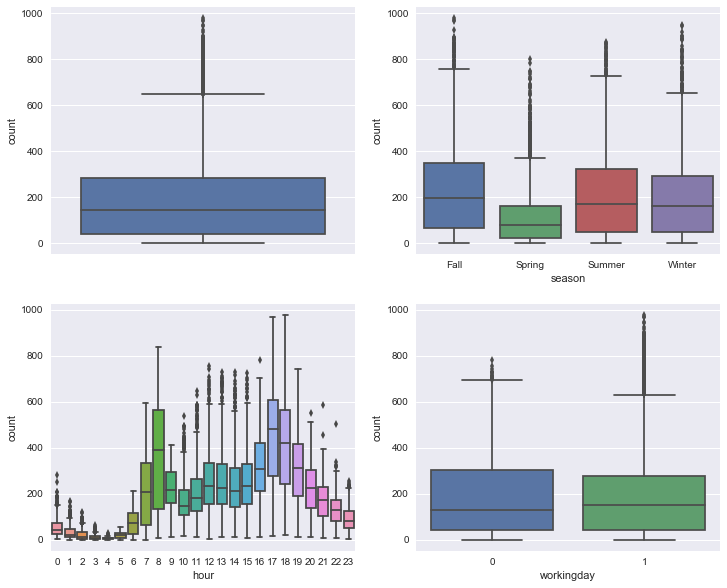

In [41]:
fig,axes=plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)
sns.boxplot(data=dailydata,y='count',orient='v',ax=axes[0][0])
sns.boxplot(data=dailydata,y='count',x='season',orient='v',
           ax=axes[0][1])
sns.boxplot(data=dailydata,y='count',x='workingday',orient='v',
           ax=axes[1][1])
sns.boxplot(data=dailydata,y='count',x='hour',orient='v',
           ax=axes[1][0])

In [42]:
# let's remove outlier in the count column

In [43]:
dailydataWithoutOutlier=dailydata[np.abs(dailydata['count']-
                                        dailydata['count'].mean())<=
                                 (3*dailydata['count'].std())]


In [46]:
dailydata.shape

(10886, 15)

In [47]:
dailydataWithoutOutlier.shape

(10739, 15)

In [48]:
# correlation analysis

In [49]:
dailydata.corr()

,temp,atemp,humidity,windspeed,casual,registered,count,date
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.015551
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.011866
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.011335
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.036157
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.014109
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.019111
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.019826
date,0.015551,0.011866,-0.011335,0.036157,0.014109,0.019111,0.019826,1.000000


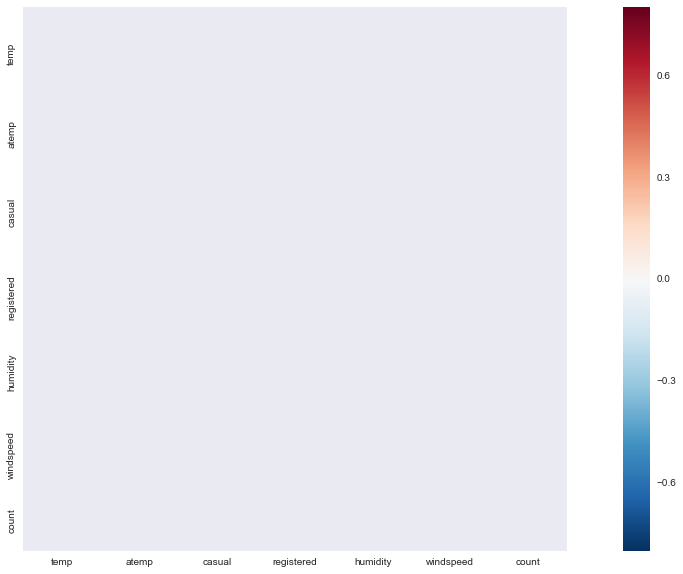

In [56]:
corrdailydata=dailydata[['temp','atemp','casual','registered',
                        'humidity','windspeed','count']].corr()
mask=np.array(corrdailydata)
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrdailydata,mask=mask,vmax=0.8,square=True,annot=True)

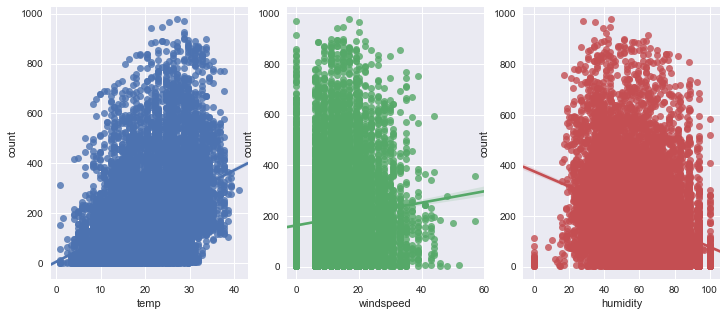

In [57]:
fig,(ax1,ax2,ax3)=plt.subplots(ncols=3)
fig.set_size_inches(12,5)
sns.regplot(x='temp',y='count',data=dailydata,ax=ax1)
sns.regplot(x='windspeed',y='count',data=dailydata,ax=ax2)
sns.regplot(x='humidity',y='count',data=dailydata,ax=ax3)
